<h1>Pandas</h1>

<li>Integrated data manipulation and analysis capabilities
<li>Integration with data visualization libraries
<li>Integration with machine learning libraries
<li>Built in time-series capabilities
<li>Optimized for speed
<li>Built-in support for grabbing data from multiple sources csv, xls, html tables, yahoo, google, worldbank, FRED

<h3>Pandas organizes data into two data objects</h3>
<li>Series: A one dimensional array object
<li>DataFrame: A two dimensional table object
<ul>
<li>Each column in a dataframe corresponds to a named series

<li>Rows in a dataframe can be indexed by a column of any datatype
</ul>

In [7]:
import pandas as pd
import numpy as np

<h2>Series</h2>

In [8]:
x = pd.Series(np.random.randint(1000,size=100))
x[:10]

0    126
1     11
2    271
3    627
4    629
5    157
6    767
7    929
8    296
9    791
dtype: int64

In [9]:
print (x.head())
print(x.tail())

0    126
1     11
2    271
3    627
4    629
dtype: int64
95     74
96     84
97    526
98    712
99    575
dtype: int64


<h3>Series are indexed</h3>
<li>Series items must be accessed through the index
<li>Iterators will iterate on the index but returning values, not on the index

In [10]:
x[0] #0 is the first location

126

In [11]:
for i in x.index:
    print(x[i])

126
11
271
627
629
157
767
929
296
791
847
696
361
76
933
646
453
830
419
246
519
755
259
191
545
72
352
667
103
895
503
550
316
808
572
848
157
769
902
910
560
811
440
260
946
71
887
598
261
119
281
243
645
607
845
175
439
614
428
457
697
729
738
638
364
901
98
746
900
205
391
875
773
225
111
849
391
447
374
937
644
987
233
100
147
551
603
122
123
182
918
6
633
268
246
74
84
526
712
575


In [12]:
#for i in x:
#    print(x[i])

In [13]:
for i in x:
    print(i)

126
11
271
627
629
157
767
929
296
791
847
696
361
76
933
646
453
830
419
246
519
755
259
191
545
72
352
667
103
895
503
550
316
808
572
848
157
769
902
910
560
811
440
260
946
71
887
598
261
119
281
243
645
607
845
175
439
614
428
457
697
729
738
638
364
901
98
746
900
205
391
875
773
225
111
849
391
447
374
937
644
987
233
100
147
551
603
122
123
182
918
6
633
268
246
74
84
526
712
575


<h3>Series and dict</h3>
<li> A dictionary will automatically be broken up into index and value pairs</li>

In [14]:
x = {'a':1,'b':2,'c':3}
y=pd.Series(x)
print(y['b'])
y

2


a    1
b    2
c    3
dtype: int64

<h3>Series objects work like numpy ndarrays</h3>
<li>The index is independent

In [15]:
y*2

a    2
b    4
c    6
dtype: int64

In [16]:
x=pd.Series([1,3,5,7,11])
y=pd.Series({'a':1,'b':2,'c':3,'d':4,'e':5})
z = pd.Series([1,2,3,4,5])
x+y
#x+z

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
a   NaN
b   NaN
c   NaN
d   NaN
e   NaN
dtype: float64

<h1>pandas DataFrame</h1>
<li>2-Dimensional structure
<li>Columns can contain data of different types (like an Excel spreadsheet)
<li>Can contain an index (or indices)
<li>Columns (and indeces) can be named


<h3>Constructing a dataframe</h3>

In [17]:
df = pd.DataFrame([[11,22,13],[21,22,23]])
df

,0,1,2
0,11,22,13
1,21,22,23


In [18]:
df = pd.DataFrame([[11,22,13],[21,22,23]])
df.columns=['c1','c2','c3']
df.index = ['a','b']
df

,c1,c2,c3
a,11,22,13
b,21,22,23


In [19]:
df = pd.DataFrame([[11,22,13],[21,22,23]],index=['a','b'],columns=['c1','c2','c3'])
df

,c1,c2,c3
a,11,22,13
b,21,22,23


In [20]:
from datetime import date
date(2016,9,23)

datetime.date(2016, 9, 23)

In [21]:
tickers = ['AAPL','GOOG','GS']
dates = ['20171002','20171003']
data = np.zeros((2,3))
df = pd.DataFrame(data,index=dates,columns=tickers)
df

,AAPL,GOOG,GS
20171002,0.0,0.0,0.0
20171003,0.0,0.0,0.0


In [22]:
np.zeros((2,3))

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [23]:
tickers = ['AAPL','GOOG','GS']
from datetime import date
dates = [date(2017,10,2),date(2017,10,3)]
data = np.zeros((2,3))
df = pd.DataFrame(data,index=dates,columns=tickers)
df

,AAPL,GOOG,GS
2017-10-02,0.0,0.0,0.0
2017-10-03,0.0,0.0,0.0


In [24]:
data = {'AAPL':[0.0,0.0],'GOOG':[0.0,0.0],'GS':[0.0,0.0]}
df = pd.DataFrame(data)
df.index = [date(2017,10,2),date(2017,10,3)]
df

,AAPL,GOOG,GS
2017-10-02,0.0,0.0,0.0
2017-10-03,0.0,0.0,0.0


<h3>Using an existing column as an index</h3>

In [25]:
df = pd.DataFrame([['r1','00','01','02'],['r2','10','11','12'],['r3','20','21','22']],columns=['row_label','A','B','C'])
df
df.set_index('row_label',inplace=True)
df


,A,B,C
row_label,,,
r1,00,01,02
r2,10,11,12
r3,20,21,22


<h4>Pandas dataframes work like dictionaries</h4>

In [26]:
data = {'AAPL':[153.2,151.7],'GOOG':[953.2,952.5],'GS':[145.3,147.1]}
df = pd.DataFrame(data)
df.index = [date(2017,10,2),date(2017,10,3)]
df

,AAPL,GOOG,GS
2017-10-02,153.2,953.2,145.3
2017-10-03,151.7,952.5,147.1


In [27]:
df['AAPL']

2017-10-02    153.2
2017-10-03    151.7
Name: AAPL, dtype: float64

In [28]:
type(df['AAPL'])

pandas.core.series.Series

In [29]:
df['AAPL'][date(2017,10,2)]

153.19999999999999

<h3>Selecting rows</h3>
<li>rows can be selected using the index df.loc[index_value]
<li>or using row number df.iloc[row_number]
<li>Note that both methods use dictionary like indexing!

In [30]:
df.loc[date(2017,10,2)]

AAPL    153.2
GOOG    953.2
GS      145.3
Name: 2017-10-02, dtype: float64

In [31]:
df.iloc[0]

AAPL    153.2
GOOG    953.2
GS      145.3
Name: 2017-10-02, dtype: float64

<h4>Accessing a specific value</h4>

In [32]:
df['AAPL'].loc[date(2017,10,3)]
#df.loc[date(2017,10,3)]['AAPL']

151.69999999999999

<h4>Add a new column</h4>

In [33]:
df['IONS'] = np.NaN
df

,AAPL,GOOG,GS,IONS
2017-10-02,153.2,953.2,145.3,NaN
2017-10-03,151.7,952.5,147.1,NaN


In [34]:
df[['AAPL','GOOG']]

,AAPL,GOOG
2017-10-02,153.2,953.2
2017-10-03,151.7,952.5


In [35]:
df = pd.DataFrame([[11,22,13],[21,22,23]])
df.columns=['c1','c2','c3']
df.index = ['a','b']
df

,c1,c2,c3
a,11,22,13
b,21,22,23


<h4>Creating a new column using a pattern</h4>

In [36]:
df['Mult3'] =np.where(df['c1']%3==0,1,0)
df

,c1,c2,c3,Mult3
a,11,22,13,0
b,21,22,23,1


<h3>Slicing</h3>

In [37]:
df = pd.DataFrame([[11,12,13,14,15],
                   [21,22,23,24,25],
                   [31,32,33,34,35],
                   [41,42,43,44,45],
                   [51,52,53,54,55]])
df.index =['r1','r2','r3','r4','r5']
df.columns = ['c1','c2','c3','c4','c5']
df

,c1,c2,c3,c4,c5
r1,11,12,13,14,15
r2,21,22,23,24,25
r3,31,32,33,34,35
r4,41,42,43,44,45
r5,51,52,53,54,55


In [38]:
df.loc['r2':'r4']

,c1,c2,c3,c4,c5
r2,21,22,23,24,25
r3,31,32,33,34,35
r4,41,42,43,44,45


In [39]:
df.loc[:,'c2':'c4']

,c2,c3,c4
r1,12,13,14
r2,22,23,24
r3,32,33,34
r4,42,43,44
r5,52,53,54


In [40]:
df.loc['r2':'r4','c2':'c4']

,c2,c3,c4
r2,22,23,24
r3,32,33,34
r4,42,43,44


In [41]:
df.iloc[1:4,1:4]

,c2,c3,c4
r2,22,23,24
r3,32,33,34
r4,42,43,44


<h3>Working with views and copies</h3>

In [42]:
df = pd.DataFrame([[11,12,13,14,15],
                   [21,22,23,24,25],
                   [31,32,33,34,35],
                   [41,42,43,44,45],
                   [51,52,53,54,55]])
df.index =['r1','r2','r3','r4','r5']
df.columns = ['c1','c2','c3','c4','c5']
df_new = df
df_new

,c1,c2,c3,c4,c5
r1,11,12,13,14,15
r2,21,22,23,24,25
r3,31,32,33,34,35
r4,41,42,43,44,45
r5,51,52,53,54,55


<h4>df_new points to the same dataframe as df</h4>

In [43]:
df.loc['r3','c3'] = 99
df_new
#df

,c1,c2,c3,c4,c5
r1,11,12,13,14,15
r2,21,22,23,24,25
r3,31,32,99,34,35
r4,41,42,43,44,45
r5,51,52,53,54,55


<h4>To work with a copy, use .copy()</h4>

In [44]:
df = pd.DataFrame([[11,12,13,14,15],
                   [21,22,23,24,25],
                   [31,32,33,34,35],
                   [41,42,43,44,45],
                   [51,52,53,54,55]])
df.index =['r1','r2','r3','r4','r5']
df.columns = ['c1','c2','c3','c4','c5']
df_new = df.copy()
df.loc['r3','c3'] = 99
df_new
#df

,c1,c2,c3,c4,c5
r1,11,12,13,14,15
r2,21,22,23,24,25
r3,31,32,33,34,35
r4,41,42,43,44,45
r5,51,52,53,54,55


<h1>Grouping functionality in Pandas</h1>
<li>Pandas allows grouping by value as well as grouping by functions

In [45]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                   'C' : ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                   'D' : ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three']})
df

,A,B,C,D
0,foo,one,one,one
1,bar,one,one,one
2,foo,two,two,two
3,bar,three,three,three
4,foo,two,two,two
5,bar,two,two,two
6,foo,one,one,one
7,foo,three,three,three


<h3>Group by column values</h3>

In [46]:
df.groupby('B').size()

B
one      3
three    2
two      3
dtype: int64

<h3>Group by multiple columns</h3>

In [47]:
df.groupby(['A','C']).size()

A    C    
bar  one      1
     three    1
     two      1
foo  one      2
     three    1
     two      2
dtype: int64

<h3>Grouping by function</h3>

In [48]:
people = pd.DataFrame(np.random.randn(5, 5), columns=['a', 'b', 'c', 'd', 'e'], index=['Joe', 'Moe', 'Jill', 'Qing', 'Ariana'])
people

,a,b,c,d,e
Joe,-0.087248,0.992538,-1.399071,1.774326,-0.032939
Moe,-0.079728,-0.032787,0.580496,-1.471283,1.637017
Jill,-0.889877,1.376952,-0.228612,-0.438993,-0.360184
Qing,0.338549,1.404159,-1.319826,-1.325642,0.689789
Ariana,-1.064639,1.319525,0.156561,0.411919,-1.909679


In [49]:
def GroupColFunc(df, ind, col):
    if df[col].loc[ind] < 0:
        return 'Negative'
    else:
        return 'Positive'

In [50]:
grouped = people.groupby(lambda x: GroupColFunc(people, x, 'a'))
print(grouped.size())
grouped.count()

Negative    4
Positive    1
dtype: int64


,a,b,c,d,e
Negative,4,4,4,4,4
Positive,1,1,1,1,1


<h3>Group statistics</h3>

In [51]:
#grouped.mean()
#grouped.std()
#grouped.count()
grouped.cumcount()
#%matplotlib inline #plot comes inside the page
#grouped.mean().plot(kind='bar')

Joe       0
Moe       1
Jill      2
Qing      0
Ariana    3
dtype: int64

<h3>Digression: Lambda functions</h3>
<li>Anonymous or "throw-away" functions
<li>Useful for dataframe operations

<h4>Example: We can change the sort parameter using a function</h4>

In [52]:
x=[(1,2),(4,5),(3,3),(9,1)]
def second_elem(x):
    return x[1]
sorted(x,key=second_elem)

[(9, 1), (1, 2), (3, 3), (4, 5)]

<h3>Or we can "inline" the function</h3>
<li>Makes it more readable

In [53]:
x=[(1,2),(4,5),(3,3),(9,1)]
sorted(x,key=lambda x: x[1])

[(9, 1), (1, 2), (3, 3), (4, 5)]

In [54]:
x=[(1,2),(4,5),(3,3),(9,1)]
sorted(x,key=lambda x: x[0]+x[1])

[(1, 2), (3, 3), (4, 5), (9, 1)]

<h2>Join, merge and concatenate dataframes</h2>


In [55]:
df1 = pd.DataFrame([[1,2,3],[4,5,6]],index=['a','b'],columns=['A','B','C'])
df1

,A,B,C
a,1,2,3
b,4,5,6


In [56]:
df2 = pd.DataFrame([[7,8,9],[10,11,12]],index=['c','d'],columns=['A','B','C'])
df2

,A,B,C
c,7,8,9
d,10,11,12


In [57]:
pd.concat([df1,df2])

,A,B,C
a,1,2,3
b,4,5,6
c,7,8,9
d,10,11,12


<h3>Concat can handle column mismatches</h3>

In [58]:
df2 = pd.DataFrame([[7,8,9],[10,11,12]],index=['c','d'],columns=['K','B','C'])
pd.concat([df1,df2])

,A,B,C,K
a,1.0,2,3,NaN
b,4.0,5,6,NaN
c,NaN,8,9,7.0
d,NaN,11,12,10.0


<h4>Concat works with multiple data frames and creates copies. Append appends to an existing dataframe</h4>

In [59]:
df1.append(df2)

,A,B,C,K
a,1.0,2,3,NaN
b,4.0,5,6,NaN
c,NaN,8,9,7.0
d,NaN,11,12,10.0


<h3>Join</h3>
<li>Pandas provides a full featured join (like SQL)
<li>https://pandas.pydata.org/pandas-docs/stable/merging.html

In [60]:
df1 = pd.DataFrame([[1,2,3],[4,5,6],[7,8,9],[10,11,12]],index=['a','b','c','d'],columns=['A','B','C'])
df1

,A,B,C
a,1,2,3
b,4,5,6
c,7,8,9
d,10,11,12


In [61]:
df2 = pd.DataFrame([[17,18,19],[101,111,121]],index=['c','d'],columns=['K','L','D'])
df2

,K,L,D
c,17,18,19
d,101,111,121


In [62]:
df1.join(df2)

,A,B,C,K,L,D
a,1,2,3,NaN,NaN,NaN
b,4,5,6,NaN,NaN,NaN
c,7,8,9,17.0,18.0,19.0
d,10,11,12,101.0,111.0,121.0


In [63]:
df1.append(df2)

,A,B,C,D,K,L
a,1.0,2.0,3.0,NaN,NaN,NaN
b,4.0,5.0,6.0,NaN,NaN,NaN
c,7.0,8.0,9.0,NaN,NaN,NaN
d,10.0,11.0,12.0,NaN,NaN,NaN
c,NaN,NaN,NaN,19.0,17.0,18.0
d,NaN,NaN,NaN,121.0,101.0,111.0


In [64]:
pd.concat([df1,df2])

,A,B,C,D,K,L
a,1.0,2.0,3.0,NaN,NaN,NaN
b,4.0,5.0,6.0,NaN,NaN,NaN
c,7.0,8.0,9.0,NaN,NaN,NaN
d,10.0,11.0,12.0,NaN,NaN,NaN
c,NaN,NaN,NaN,19.0,17.0,18.0
d,NaN,NaN,NaN,121.0,101.0,111.0


<h1>Working with Pandas</h1>

In [65]:
#installing pandas libraries
!source activate py36;pip install pandas-datareader
#!pip install --upgrade html5lib==1.0b8

#There is a bug in the latest version of html5lib so install an earlier version
#Restart kernel after installing html5lib

Could not find conda environment: py36
You can list all discoverable environments with `conda info --envs`.

    100% |████████████████████████████████| 81kB 2.3MB/s ta 0:00:01
  Running setup.py bdist_wheel for requests-ftp ... done
  Stored in directory: /Users/dc/Library/Caches/pip/wheels/76/fb/0d/1026eb562c34a4982dc9d39c9c582a734eefe7f0455f711deb
Successfully built requests-ftp


<h2>Imports</h2>

In [66]:
import pandas as pd #pandas library
from pandas_datareader import data as web #data readers (google, html, etc.)
#The following line ensures that graphs are rendered in the notebook
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt #Plotting library
import datetime as dt #datetime for timeseries support

<h2>Pandas datareader</h2>
<li>Access data from html tables on any web page</li>
<li>Get data from google finance</li>
<li>Get data from the federal reserve</li>
<li>Read csv files</li>

<h3>HTML Tables</h3>
<li>Pandas datareader can read a table in an html page into a dataframe
<li>the read_html function returns a list of all dataframes with one dataframe for each html table on the page

<h4>Example: Read the tables on the google finance page</h4>

In [67]:
df_list = pd.read_html('http://www.bloomberg.com/markets/currencies/major')
print(len(df_list))

1


<h4>The page contains only one table so the read_html function returns a list of one element</h4>

In [68]:
df = df_list[0]
print(df)

   Currency      Value  Change Net Change Time (EST)  2 Day
0   EUR-USD     1.2427  0.0031     +0.25%  1/26/2018    NaN
1   USD-JPY   108.5800 -0.8300     -0.76%  1/26/2018    NaN
2   GBP-USD     1.4160  0.0018     +0.13%  1/26/2018    NaN
3   AUD-USD     0.8110  0.0084     +1.05%  1/26/2018    NaN
4   USD-CAD     1.2308 -0.0069     -0.56%  1/26/2018    NaN
5   USD-CHF     0.9324 -0.0083     -0.88%  1/26/2018    NaN
6   EUR-JPY   134.9600 -0.6800     -0.50%  1/26/2018    NaN
7   EUR-GBP     0.8781  0.0017     +0.19%  1/26/2018    NaN
8   USD-HKD     7.8181  0.0005     +0.01%  1/26/2018    NaN
9   EUR-CHF     1.1610 -0.0061     -0.52%  1/26/2018    NaN
10  USD-KRW  1064.0100  5.3800     +0.51%  1/26/2018    NaN


<h4>Note that the read_html function has automatically detected the header columns</h4>
<h4>If an index is necessary, we need to explicitly specify it</h4>

In [69]:
df.set_index('Currency',inplace=True)
print(df)

              Value  Change Net Change Time (EST)  2 Day
Currency                                                
EUR-USD      1.2427  0.0031     +0.25%  1/26/2018    NaN
USD-JPY    108.5800 -0.8300     -0.76%  1/26/2018    NaN
GBP-USD      1.4160  0.0018     +0.13%  1/26/2018    NaN
AUD-USD      0.8110  0.0084     +1.05%  1/26/2018    NaN
USD-CAD      1.2308 -0.0069     -0.56%  1/26/2018    NaN
USD-CHF      0.9324 -0.0083     -0.88%  1/26/2018    NaN
EUR-JPY    134.9600 -0.6800     -0.50%  1/26/2018    NaN
EUR-GBP      0.8781  0.0017     +0.19%  1/26/2018    NaN
USD-HKD      7.8181  0.0005     +0.01%  1/26/2018    NaN
EUR-CHF      1.1610 -0.0061     -0.52%  1/26/2018    NaN
USD-KRW   1064.0100  5.3800     +0.51%  1/26/2018    NaN


<h4>Now we can use .loc to extract specific currency rates</h4>

In [70]:
df.loc['EUR-CHF','Value']

1.161

<h3>View vs. copy redux</h3>

<h4>Chained indexing creates a copy and changes to the copy won't be reflected in the original dataframe</h4>

In [71]:
eur_usd = df.loc['EUR-USD']['Change'] #This is chained indexing
df.loc['EUR-USD']['Change'] = 1.0 #Here we are changing a value in a copy of the dataframe
print(eur_usd)
print(df.loc['EUR-USD']['Change']) #Neither eur_usd, nor the dataframe are changed
df


0.0031
0.0031


/Users/dc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Value,Change,Net Change,Time (EST),2 Day
Currency,,,,,
EUR-USD,1.2427,0.0031,+0.25%,1/26/2018,NaN
USD-JPY,108.5800,-0.8300,-0.76%,1/26/2018,NaN
GBP-USD,1.4160,0.0018,+0.13%,1/26/2018,NaN
AUD-USD,0.8110,0.0084,+1.05%,1/26/2018,NaN
USD-CAD,1.2308,-0.0069,-0.56%,1/26/2018,NaN
USD-CHF,0.9324,-0.0083,-0.88%,1/26/2018,NaN
EUR-JPY,134.9600,-0.6800,-0.50%,1/26/2018,NaN
EUR-GBP,0.8781,0.0017,+0.19%,1/26/2018,NaN
USD-HKD,7.8181,0.0005,+0.01%,1/26/2018,NaN


<h4>If we don't use chained indexing, we're working with a view and changes will be reflected</h4

In [72]:
eur_usd = df.loc['EUR-USD','Change'] #eur_usd points to the value inside the dataframe
df.loc['EUR-USD','Change'] = 1.0 #Change the value in the view 
print(eur_usd) #eur_usd is changed (because it points to the view)
print(df.loc['EUR-USD']['Change'])#The dataframe has been correctly updated
print(df.loc['EUR-USD','Change'])

0.0031
1.0
1.0


<h2>Getting historical stock prices from yahoo finance</h2>
Usage: DataReader(ticker,source,startdate,enddate)<br>



In [73]:
from pandas_datareader import data as web
import datetime
start=datetime.datetime(2000, 1, 1)
end=datetime.datetime.today()


print(start,end)


df = web.DataReader('IBM', 'yahoo', start, end)


2000-01-01 00:00:00 2018-01-27 17:46:00.481321


In [74]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,112.437500,116.000000,111.875000,116.000000,85.152336,10347700
2000-01-04,114.000000,114.500000,110.875000,112.062500,82.261917,8227800
2000-01-05,112.937500,119.750000,112.125000,116.000000,85.152336,12733200
2000-01-06,118.000000,118.937500,113.500000,114.000000,83.684181,7971900
2000-01-07,117.250000,117.937500,110.625000,113.500000,83.317116,11856700
2000-01-10,117.250000,119.375000,115.375000,118.000000,86.620468,8540500
2000-01-11,117.875000,121.125000,116.625000,119.000000,87.354546,7873300
2000-01-12,119.625000,122.000000,118.250000,119.500000,87.721558,6803800
2000-01-13,119.937500,121.000000,115.750000,118.250000,86.803993,8489700


<h2>Datareader documentation</h2>
http://pandas-datareader.readthedocs.io/en/latest/</h2>

<h3>Working with a timeseries data frame</h3>
<li>The data is organized by time with the index serving as the timeline


<h4>Creating new columns</h4>
<li>Add a column to a dataframe
<li>Base the elements of the column on some combination of data in the existing columns
<h4>Example: Number of Days that the stock closed higher than it opened
<li>We'll create a new column with the header "UP"
<li>And use np.where to decide what to put in the column

In [75]:
df['UP']=np.where(df['Close']>df['Open'],1,0)
df

,Open,High,Low,Close,Adj Close,Volume,UP
Date,,,,,,,
2000-01-03,112.437500,116.000000,111.875000,116.000000,85.152336,10347700,1
2000-01-04,114.000000,114.500000,110.875000,112.062500,82.261917,8227800,0
2000-01-05,112.937500,119.750000,112.125000,116.000000,85.152336,12733200,1
2000-01-06,118.000000,118.937500,113.500000,114.000000,83.684181,7971900,0
2000-01-07,117.250000,117.937500,110.625000,113.500000,83.317116,11856700,0
2000-01-10,117.250000,119.375000,115.375000,118.000000,86.620468,8540500,1
2000-01-11,117.875000,121.125000,116.625000,119.000000,87.354546,7873300,1
2000-01-12,119.625000,122.000000,118.250000,119.500000,87.721558,6803800,0
2000-01-13,119.937500,121.000000,115.750000,118.250000,86.803993,8489700,0


<h3>Get summary statistics</h3>
<li>The "describe" function returns a dataframe containing summary stats for all numerical columns
<li>Columns containing non-numerical data are ignored

In [76]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,UP
count,4546.000000,4546.000000,4546.000000,4546.000000,4546.000000,4.546000e+03,4546.000000
mean,128.367600,129.541532,127.304987,128.444071,107.507687,6.284509e+06,0.521337
std,40.104212,40.178215,40.036592,40.116924,40.664018,3.319553e+06,0.499599
min,54.650002,56.700001,54.009998,55.070000,41.037880,1.027500e+06,0.000000
25%,92.312502,93.209999,91.510002,92.412502,70.170963,4.023825e+06,0.000000
50%,119.622501,121.030002,118.125000,119.599998,93.102993,5.505600e+06,1.000000
75%,162.050003,163.087497,161.107502,162.070007,148.497829,7.644475e+06,1.000000
max,215.380005,215.899994,214.300003,215.800003,186.374741,4.120730e+07,1.000000


<h4>Calculate the percentage of days that the stock has closed higher than its open</h4>

In [77]:
df['UP'].sum()/df['UP'].count()

0.52133743950725908

<h4>Calculate percent changes</h4>
<li>The function pct_change computes a percent change between successive rows (times in  timeseries data)
<li>Defaults to a single time delta
<li>With an argument, the time delta can be changed

In [78]:
df['Close'].pct_change() #One timeperiod percent change

Date
2000-01-03         NaN
2000-01-04   -0.033944
2000-01-05    0.035137
2000-01-06   -0.017241
2000-01-07   -0.004386
2000-01-10    0.039648
2000-01-11    0.008475
2000-01-12    0.004202
2000-01-13   -0.010460
2000-01-14    0.011628
2000-01-18   -0.032393
2000-01-19    0.032397
2000-01-20   -0.004184
2000-01-21    0.021008
2000-01-24    0.000000
2000-01-25   -0.019547
2000-01-26   -0.019937
2000-01-27   -0.027837
2000-01-28   -0.017070
2000-01-31    0.006162
2000-02-01   -0.020045
2000-02-02    0.031818
2000-02-03    0.031938
2000-02-04   -0.012807
2000-02-07   -0.012973
2000-02-08    0.041073
2000-02-09   -0.012099
2000-02-10    0.014909
2000-02-11   -0.031480
2000-02-14    0.005959
                ...   
2017-12-13   -0.018055
2017-12-14    0.000585
2017-12-15   -0.009740
2017-12-18    0.005443
2017-12-19   -0.000652
2017-12-20   -0.001827
2017-12-21   -0.009480
2017-12-22    0.006601
2017-12-26    0.002164
2017-12-27    0.001963
2017-12-28    0.005943
2017-12-29   -0.004025
2018-0

In [79]:
n=13
df['Close'].pct_change(n) #n timeperiods percent change

Date
2000-01-03         NaN
2000-01-04         NaN
2000-01-05         NaN
2000-01-06         NaN
2000-01-07         NaN
2000-01-10         NaN
2000-01-11         NaN
2000-01-12         NaN
2000-01-13         NaN
2000-01-14         NaN
2000-01-18         NaN
2000-01-19         NaN
2000-01-20         NaN
2000-01-21    0.047414
2000-01-24    0.084216
2000-01-25    0.026940
2000-01-26    0.024123
2000-01-27    0.000000
2000-01-28   -0.054555
2000-01-31   -0.056723
2000-02-01   -0.079498
2000-02-02   -0.040169
2000-02-03   -0.020899
2000-02-04   -0.001080
2000-02-07   -0.044979
2000-02-08   -0.001576
2000-02-09   -0.033951
2000-02-10   -0.019547
2000-02-11   -0.031480
2000-02-14   -0.005889
                ...   
2017-12-13    0.013633
2017-12-14    0.013291
2017-12-15    0.000197
2017-12-18   -0.001433
2017-12-19   -0.004806
2017-12-20   -0.011696
2017-12-21   -0.031701
2017-12-22   -0.018346
2017-12-26   -0.008241
2017-12-27   -0.002865
2017-12-28   -0.004974
2017-12-29   -0.012805
2018-0

<h3>NaN support</h3>
Pandas functions can ignore NaNs

In [80]:
n=13
df['Close'].pct_change(n).mean()

0.0025439711212426343

<h3>Rolling windows</h3>
<li>"rolling" function extracts rolling windows
<li>For example, the 21 period rolling window of the 13 period percent change 

In [81]:
df['Close'].pct_change(n).rolling(21)

Rolling [window=21,center=False,axis=0]

<h4>Calculate something on the rolling windows</h4>

<h4>Example: mean (the 21 day moving average of the 13 day percent change)

In [82]:
n=13
df['Close'].pct_change(n).rolling(21).mean()

Date
2000-01-03         NaN
2000-01-04         NaN
2000-01-05         NaN
2000-01-06         NaN
2000-01-07         NaN
2000-01-10         NaN
2000-01-11         NaN
2000-01-12         NaN
2000-01-13         NaN
2000-01-14         NaN
2000-01-18         NaN
2000-01-19         NaN
2000-01-20         NaN
2000-01-21         NaN
2000-01-24         NaN
2000-01-25         NaN
2000-01-26         NaN
2000-01-27         NaN
2000-01-28         NaN
2000-01-31         NaN
2000-02-01         NaN
2000-02-02         NaN
2000-02-03         NaN
2000-02-04         NaN
2000-02-07         NaN
2000-02-08         NaN
2000-02-09         NaN
2000-02-10         NaN
2000-02-11         NaN
2000-02-14         NaN
                ...   
2017-12-13    0.010056
2017-12-14    0.012150
2017-12-15    0.014198
2017-12-18    0.015746
2017-12-19    0.017090
2017-12-20    0.017622
2017-12-21    0.016547
2017-12-22    0.015614
2017-12-26    0.014905
2017-12-27    0.014571
2017-12-28    0.014051
2017-12-29    0.012412
2018-0

<h4>Calculate several moving averages and graph them</h4>

In [83]:
ma_8 = df['Close'].pct_change(n).rolling(window=8).mean()
ma_13= df['Close'].pct_change(n).rolling(window=13).mean()
ma_21= df['Close'].pct_change(n).rolling(window=21).mean()
ma_34= df['Close'].pct_change(n).rolling(window=34).mean()
ma_55= df['Close'].pct_change(n).rolling(window=55).mean()

<h2>Plotting pandas series</h2>
<li>Pandas is tightly integrated with matplotlib, a graphing library
<li>All you need do is call 'plot' on any series
<li>When working on a jupyter notebook, add %matplotlib inline

In [84]:
%matplotlib inline

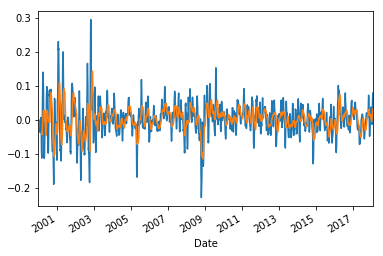

In [85]:
ma_8.plot()
ma_34.plot()

<h2>Linear regression with pandas</h2>
<h4>Example: TAN is the ticker for a solar ETF. FSLR, RGSE, and SCTY are tickers of companies that build or lease solar panels. Each has a different business model. We'll use pandas to study the risk reward tradeoff between the 4 investments and also see how correlated they are</h4>

In [86]:
import datetime
import pandas_datareader.data as web
start = datetime.datetime(2015,7,1)
end = datetime.datetime(2016,7,1)
solar_df = web.DataReader(['FSLR', 'TAN','RGSE','SPWR'],'yahoo', start,end)['Close']

In [87]:
solar_df

,FSLR,RGSE,SPWR,TAN
Date,,,,
2016-07-01,48.490002,4.100000,15.460000,21.000000
2016-06-30,48.480000,4.020000,15.490000,20.959999
2016-06-29,48.090000,4.210000,15.210000,20.639999
2016-06-28,46.369999,4.260000,14.730000,20.020000
2016-06-27,44.230000,4.500000,13.490000,19.320000
2016-06-24,46.020000,4.750000,14.160000,19.860001
2016-06-23,48.650002,5.120000,15.470000,20.850000
2016-06-22,48.619999,4.810000,15.010000,20.400000
2016-06-21,48.910000,4.600000,14.910000,20.580000


<h4>Since the data is in reverse temporal order, let's reverse the contents of the dataframe</h4>

In [88]:
solar_df = solar_df[::-1]
solar_df

,FSLR,RGSE,SPWR,TAN
Date,,,,
2015-07-01,46.040001,37.599998,27.900000,38.840000
2015-07-02,45.169998,40.000000,27.490000,38.549999
2015-07-06,44.189999,33.599998,26.830000,36.369999
2015-07-07,45.119999,32.799999,26.990000,36.099998
2015-07-08,43.270000,28.400000,26.020000,33.669998
2015-07-09,43.650002,29.200001,25.980000,35.230000
2015-07-10,44.029999,31.400000,26.290001,36.490002
2015-07-13,46.009998,32.599998,26.980000,37.369999
2015-07-14,45.810001,30.200001,28.030001,37.860001


<h4>Let's calculate returns (the 1 day percent change)</h4>

In [89]:
rets = solar_df.pct_change()
print(rets)

                FSLR      RGSE      SPWR       TAN
Date                                              
2015-07-01       NaN       NaN       NaN       NaN
2015-07-02 -0.018897  0.063830 -0.014695 -0.007467
2015-07-06 -0.021696 -0.160000 -0.024009 -0.056550
2015-07-07  0.021045 -0.023809  0.005963 -0.007424
2015-07-08 -0.041002 -0.134146 -0.035939 -0.067313
2015-07-09  0.008782  0.028169 -0.001537  0.046332
2015-07-10  0.008706  0.075342  0.011932  0.035765
2015-07-13  0.044969  0.038216  0.026246  0.024116
2015-07-14 -0.004347 -0.073620  0.038918  0.013112
2015-07-15 -0.028815 -0.019868 -0.030681 -0.021130
2015-07-16  0.006069  0.006757 -0.005889  0.012142
2015-07-17 -0.018096  0.006711 -0.010737 -0.000800
2015-07-20 -0.015245 -0.053333 -0.014970  0.004803
2015-07-21  0.004621  0.049296 -0.012918 -0.015932
2015-07-22 -0.022539  0.033557 -0.011547 -0.011873
2015-07-23  0.005647 -0.025974 -0.001947 -0.020207
2015-07-24  0.005381  0.046667 -0.007023 -0.011427
2015-07-27 -0.016290  0.025478 

<h4>Let's visualize the relationship between each stock and the ETF</h4>

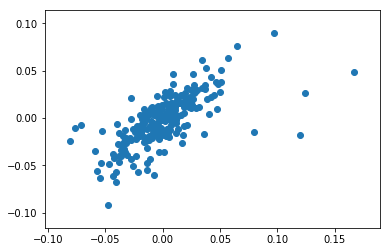

In [90]:
import matplotlib.pyplot as plt
plt.scatter(rets.FSLR,rets.TAN)

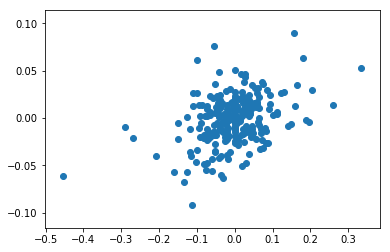

In [91]:
plt.scatter(rets.RGSE,rets.TAN)

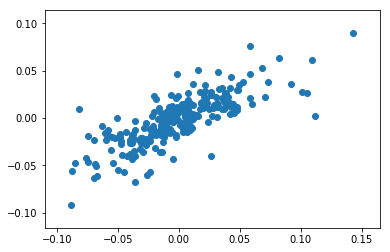

In [92]:
plt.scatter(rets.SPWR,rets.TAN)

<h4>The correlation matrix</h4>

In [93]:
solar_corr = rets.corr()
solar_corr

,FSLR,RGSE,SPWR,TAN
FSLR,1.000000,0.254585,0.670324,0.684332
RGSE,0.254585,1.000000,0.321994,0.390370
SPWR,0.670324,0.321994,1.000000,0.783261
TAN,0.684332,0.390370,0.783261,1.000000


<h3>Basic risk analysis</h3>
<h4>We'll plot the mean and std or returns for each ticker to get a sense of the risk return profile</h4>

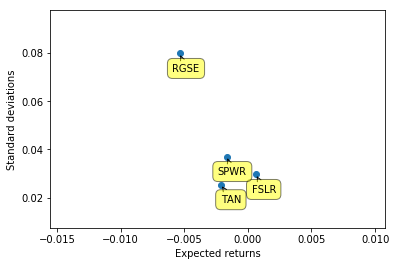

In [94]:
plt.scatter(rets.mean(), rets.std())
plt.xlabel('Expected returns')
plt.ylabel('Standard deviations')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
plt.show()


In [95]:
rets.columns

Index(['FSLR', 'RGSE', 'SPWR', 'TAN'], dtype='object')

In [96]:
rets.mean()

FSLR    0.000632
RGSE   -0.005365
SPWR   -0.001652
TAN    -0.002106
dtype: float64

Text(0,0.5,'Standard deviations')

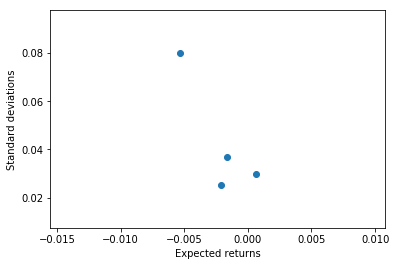

In [97]:
plt.scatter(rets.mean(), rets.std())
plt.xlabel('Expected returns')
plt.ylabel('Standard deviations')

<h2>Regressions</h2>
http://statsmodels.sourceforge.net/

<h3>Steps for regression</h3>
<li>Construct y (dependent variable series)
<li>Construct matrix (dataframe) of X (independent variable series)
<li>Add intercept
<li>Model the regression
<li>Get the results
<h3>The statsmodels library contains various regression packages. We'll use the OLS (Ordinary Least Squares) model

In [98]:
import numpy as np
import statsmodels.api as sm
X=solar_df[['FSLR','RGSE','SPWR']]
X = sm.add_constant(X)
y=solar_df['TAN']
model = sm.OLS(y,X,missing='drop')
result = model.fit()
print(result.summary())

/Users/dc/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                    TAN   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     1403.
Date:                Sat, 27 Jan 2018   Prob (F-statistic):          4.68e-156
Time:                        17:46:04   Log-Likelihood:                -394.85
No. Observations:                 254   AIC:                             797.7
Df Residuals:                     250   BIC:                             811.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.6147      0.593     28.025      0.0

<h4>Finally plot the fitted line with the actual y values

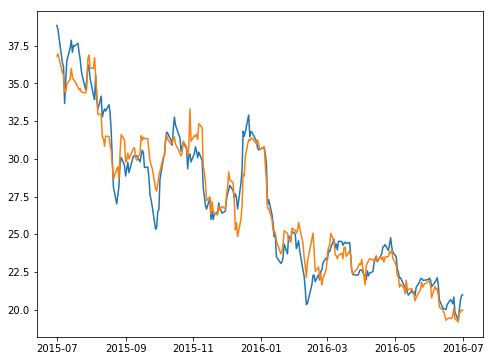

In [99]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(y)
ax.plot(result.fittedvalues)